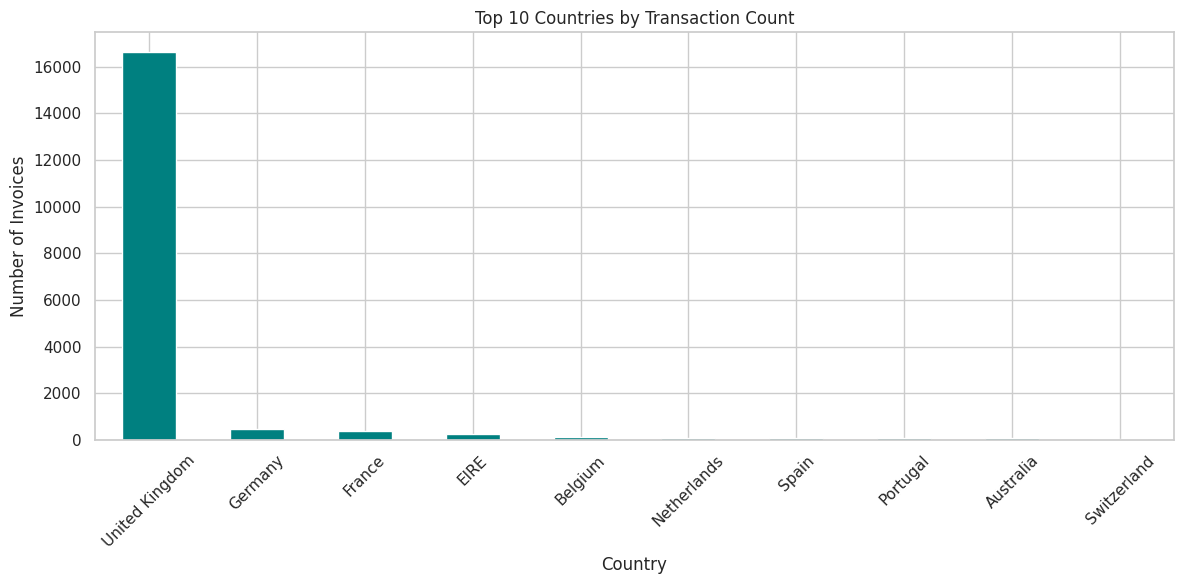

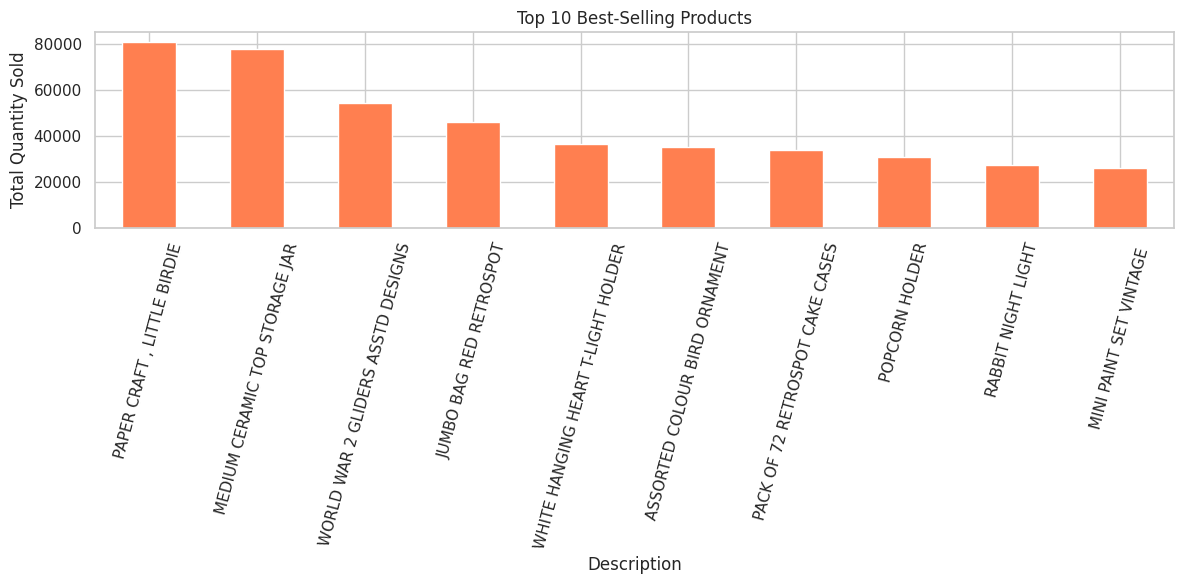

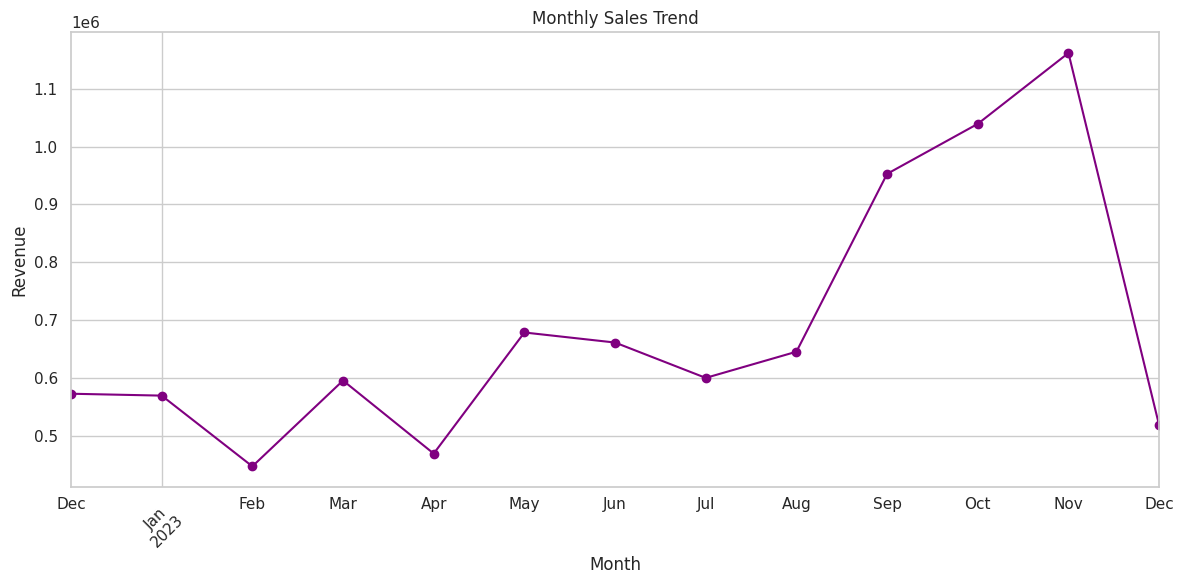

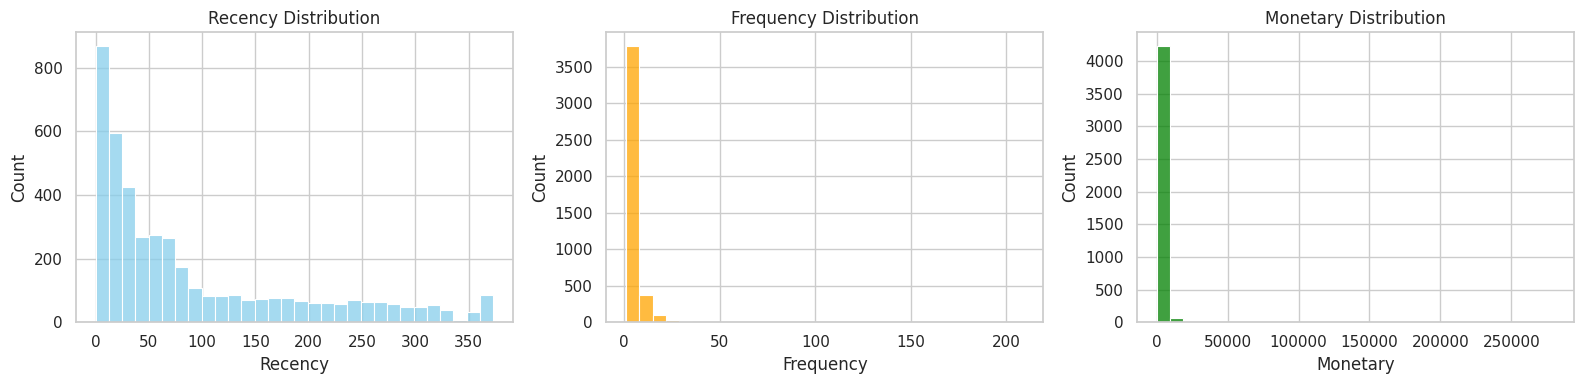

In [1]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 📂 Load cleaned data
df = pd.read_csv("../data/cleaned_data.csv", parse_dates=["InvoiceDate"])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 🎯 Set plot style
sns.set(style="whitegrid")

# --------------------------------------------
# 🌍 1. Transactions by Country
# --------------------------------------------
country_orders = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,6))
country_orders.head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries by Transaction Count")
plt.ylabel("Number of Invoices")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 🛒 2. Top Selling Products
# --------------------------------------------
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
top_products.head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📆 3. Monthly Purchase Trends
# --------------------------------------------
df['Month'] = df['InvoiceDate'].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', color='purple')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# 📊 4. RFM Distributions (Preview for next step)
# --------------------------------------------

# Get max invoice date for recency calc
snapshot_date = df['InvoiceDate'].max()

# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Plot RFM distributions
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, color='skyblue')
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, color='orange')
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, color='green')
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()
